<a href="https://colab.research.google.com/github/yeoncw1226/2024_2_dataScienceProject_team5/blob/main/Hospital_%26_Public_transportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**HEALTH**

The importance of hospital proximity as one of factors considered in the analysis is proved by a correlation analysis of deaths per population and hospital density in every per 10 km² in 17 provinces in Korea.

Data used:

1.   Population density by Population Census
     https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B08024&conn_path=I2&language=en
2.   Number of Healthcare Providers by City/Province and Provider Type
     https://kosis.kr/statHtml/statHtml.do?orgId=354&tblId=DT_MIRE01&conn_path=I2&language=en
3.   Deaths by city & province/cause(104 item)/By sex
     https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B34E12&conn_path=I2&language=en



In [ ]:
from google.colab import files

myFile = files.upload()

Saving population density.csv to population density.csv
Saving hospitals in korea.csv to hospitals in korea.csv
Saving deaths by city.csv to deaths by city.csv


In [ ]:
# Read the Excel file
hospitals = pd.read_csv('hospitals in korea.csv')
deaths = pd.read_csv('deaths by city.csv')
popul = pd.read_csv('population density.csv')

In [ ]:
deaths

,By province,2023
0,Whole country,299.7
1,Seoul,256.8
2,Busan,325.0
3,Daegu,302.9
4,Incheon,311.8
5,Gwangju,308.2
6,Daejeon,296.9
7,Ulsan,315.7
8,Sejong,277.4
9,Gyeonggi-do,286.0


In [ ]:
deaths.columns = ['By province', 'Deaths']
deaths

,By province,Deaths
0,Whole country,299.7
1,Seoul,256.8
2,Busan,325.0
3,Daegu,302.9
4,Incheon,311.8
5,Gwangju,308.2
6,Daejeon,296.9
7,Ulsan,315.7
8,Sejong,277.4
9,Gyeonggi-do,286.0


In [ ]:
hospitals

,By province,Sub Summary,Tertiary Hospital,General Hospital,Hospital
0,Total,1779,45,331,1403
1,Seoul,286,14,42,230
2,Busan,171,3,26,142
3,Daegu,110,5,14,91
4,Incheon,78,3,18,57
5,Gwangju,101,2,22,77
6,Daejeon,56,1,9,46
7,Ulsan,43,1,8,34
8,Sejong,5,0,2,3
9,Gyeonggi-do,357,5,66,286


In [ ]:
area_data = {
    'By province': ['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong',
                   'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do',
                   'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
    'Area (km²)': [605.2, 769.6, 883.6, 1062.6, 501.2, 539.3, 1060.8, 464.9, 10183.5, 16827.1, 7407.3, 8226.1,
                    8069.1, 12318.8, 19031.4, 10539.6, 1849.1]
}

areas = pd.DataFrame(area_data)
areas

,By province,Area (km²)
0,Seoul,605.2
1,Busan,769.6
2,Daegu,883.6
3,Incheon,1062.6
4,Gwangju,501.2
5,Daejeon,539.3
6,Ulsan,1060.8
7,Sejong,464.9
8,Gyeonggi-do,10183.5
9,Gangwon-do,16827.1


In [ ]:
deathPopu = pd.merge(deaths, popul, on='By province')

# Calculate death per population density (km²)
deathPopu['Death / Population density'] = (deathPopu['Deaths'] / deathPopu['Population density'])

print(deathPopu)

          By province  Deaths  Population density  Death / Population density
0       Whole country   299.7               515.4                    0.581490
1               Seoul   256.8             15506.4                    0.016561
2               Busan   325.0              4252.0                    0.076435
3               Daegu   302.9              1586.7                    0.190899
4             Incheon   311.8              2835.7                    0.109955
5             Gwangju   308.2              2908.5                    0.105965
6             Daejeon   296.9              2724.0                    0.108994
7               Ulsan   315.7              1042.0                    0.302975
8         Gyeonggi-do   286.0              1354.5                    0.211148
9          Gangwon-do   328.5                90.8                    3.617841
10  Chungcheongbuk-do   334.3               221.6                    1.508574
11  Chungcheongnam-do   322.4               268.7               

In [ ]:
hospArea = pd.merge(hospitals, areas, on='By province')

# Calculate hospital density (hospitals per 10 km²)
hospArea['Hospital Density (per 10 km²)'] = (hospArea['Sub Summary'] / hospArea['Area (km²)']) * 10

print(hospArea[['By province', 'Sub Summary', 'Area (km²)', 'Hospital Density (per 10 km²)']])

          By province  Sub Summary  Area (km²)  Hospital Density (per 10 km²)
0               Seoul          286       605.2                       4.725711
1               Busan          171       769.6                       2.221933
2               Daegu          110       883.6                       1.244907
3             Incheon           78      1062.6                       0.734049
4             Gwangju          101       501.2                       2.015164
5             Daejeon           56       539.3                       1.038383
6               Ulsan           43      1060.8                       0.405354
7              Sejong            5       464.9                       0.107550
8         Gyeonggi-do          357     10183.5                       0.350567
9          Gangwon-do           52     16827.1                       0.030903
10  Chungcheongbuk-do           48      7407.3                       0.064801
11  Chungcheongnam-do           59      8226.1                  

In [ ]:
merged_data = pd.merge(hospArea, deathPopu, on='By province')

# Print the merged data to check
print(merged_data[['By province', 'Sub Summary', 'Hospital Density (per 10 km²)', 'Deaths', 'Population density','Death / Population density']])

          By province  Sub Summary  Hospital Density (per 10 km²)  Deaths  \
0               Seoul          286                       4.725711   256.8   
1               Busan          171                       2.221933   325.0   
2               Daegu          110                       1.244907   302.9   
3             Incheon           78                       0.734049   311.8   
4             Gwangju          101                       2.015164   308.2   
5             Daejeon           56                       1.038383   296.9   
6               Ulsan           43                       0.405354   315.7   
7         Gyeonggi-do          357                       0.350567   286.0   
8          Gangwon-do           52                       0.030903   328.5   
9   Chungcheongbuk-do           48                       0.064801   334.3   
10  Chungcheongnam-do           59                       0.071723   322.4   
11       Jeollabuk-do           74                       0.091708   319.7   

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_data['Hospital Density (per 10 km²)'], merged_data['Death / Population density'])
print(f'Correlation between hospital density and deaths: {correlation}')
print(f'P-value: {p_value}')

Correlation between hospital density and deaths: -0.5438276406617557
P-value: 0.029439958061432788


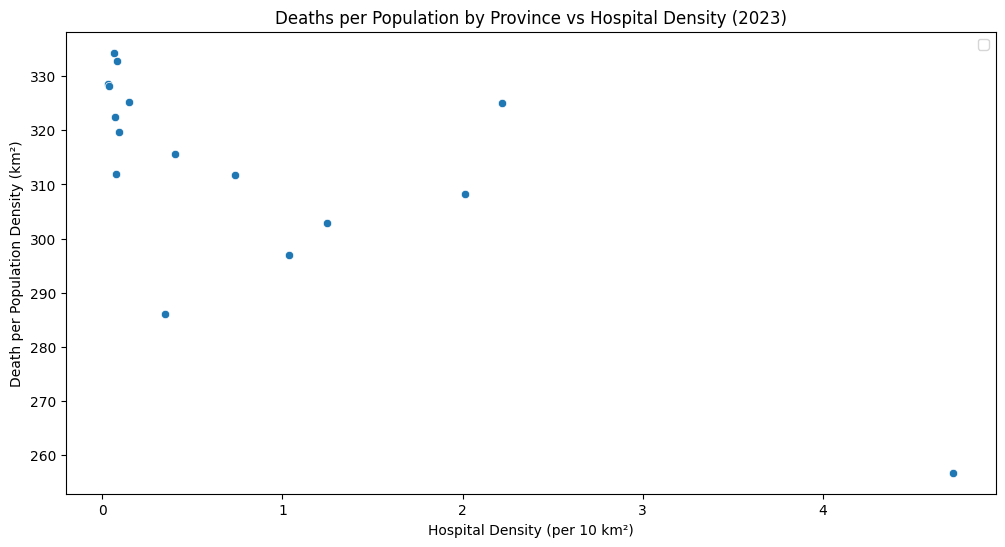

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Hospital Density (per 10 km²)', y='Deaths', data=merged_data)
plt.title('Deaths per Population by Province vs Hospital Density (2023)')
plt.xlabel('Hospital Density (per 10 km²)')
plt.ylabel('Death per Population Density (km²)')
plt.legend()
plt.show()

**CONVENIENCE**

The importance of public transportation in our location analysis is proved by comparing modes of transportation used by University students in Korea in 2023.

Data used:

1.   Population density by Population Census
     https://data.si.re.kr/si-survey/65241

In [ ]:
from google.colab import files

myFile = files.upload()

Saving mode of transportation used by students.xlsx to mode of transportation used by students.xlsx


For the transportation mode column, below was the original mode names then 5,6,7 was combined together to be 1 category because bus, train and mix of bus and train is what we want to consider in this project.

1. Walking
2. Bicycle
3. Bicycle + other
4. Motorcycle
5. Bus
6. Train
7. Bus + train
8. Taxi
9. Car
10. Car + bus
11. Car + train
12. Personal means of transportation
13. Other

For the educational level of the respondents at the time answering the survey, below was the original categories then 5,6,7 was combined together into 1 category which is university students.

1. Have not received (preschool included)
2. Elementary school
3. Middle school
4. High school
5. University (2nd and 3rd year)
6. University (4 years or more)
7. Graduate School


In [ ]:
# Read the Excel file
transpMode = pd.read_excel('mode of transportation used by students.xlsx')


# Remove null values
transpM = transpMode.dropna()
transpM['Transportation mode'] = transpM['Transportation mode'].astype(int)
transpM['Educational level'] = transpM['Educational level'].replace({6: 5, 7: 5})
transpM['Transportation mode'] = transpM['Transportation mode'].replace({6: 5, 7: 5})
transpM['Transportation mode'] = transpM['Transportation mode'].replace({8:6, 9: 7, 10: 8, 11: 9, 12: 10, 13:11})

# Display the cleaned DataFrame
transpStud = transpM.groupby(['Transportation mode', 'Educational level']).size().reset_index(name='Number of user')
transpStud = transpStud[transpStud['Educational level'].isin([5])]

transpStud

<ipython-input-41-a3b783661871>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transpM['Transportation mode'] = transpM['Transportation mode'].astype(int)
<ipython-input-41-a3b783661871>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transpM['Educational level'] = transpM['Educational level'].replace({6: 5, 7: 5})
<ipython-input-41-a3b783661871>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Transportation mode,Educational level,Number of user
4,1,5,1542
7,2,5,146
10,3,5,20
14,4,5,62
19,5,5,10419
22,6,5,26
27,7,5,4782
30,8,5,109
33,9,5,338
35,10,5,13


In [ ]:
mode_names = {
    1: 'Walking',
    2: 'Bicycle',
    3: 'Bicycle+other',
    4: 'Motorcycle',
    5: 'Bus/Train/Bus+train',
    6: 'Taxi',
    7: 'Car',
    8: 'Car+bus',
    9: 'Car+train',
    10: 'Personal transportation',
    11: 'Other'
}

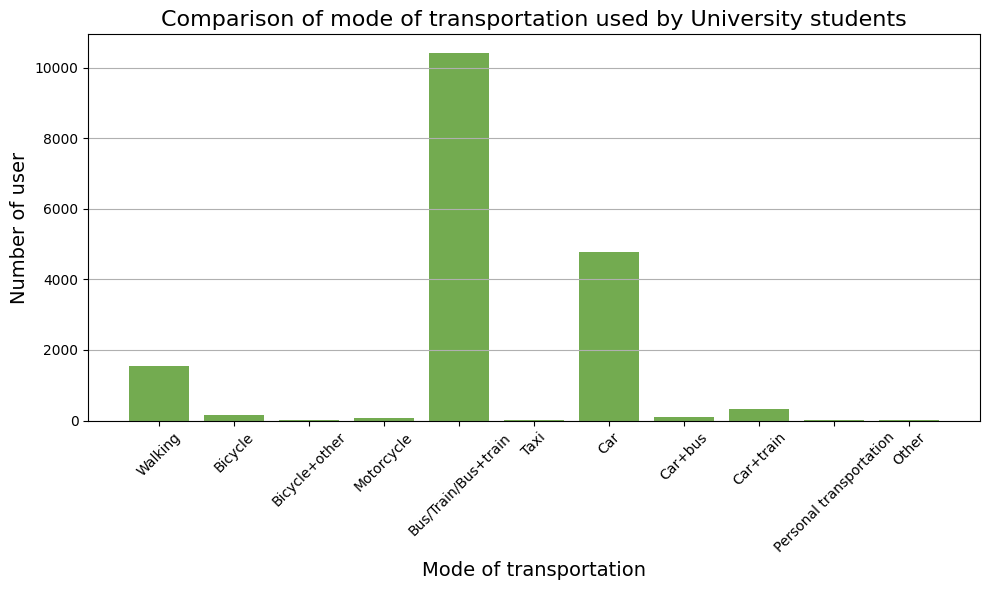

In [ ]:
plt.figure(figsize=(10, 6))
for key, grp in transpStud.groupby(['Educational level']):
    plt.bar(grp['Transportation mode'], grp['Number of user'], label=f'Educational level {key}', alpha=0.7, color='#388806')

plt.title('Comparison of mode of transportation used by University students', fontsize=16)
plt.xlabel('Mode of transportation', fontsize=14)
plt.ylabel('Number of user', fontsize=14)
plt.xticks(ticks=transpStud['Transportation mode'] , labels=[mode_names[i] for i in transpStud['Transportation mode']])
plt.xticks(rotation=45)
plt.subplots_adjust()
plt.grid(axis='y')
plt.tight_layout()
plt.show()